In [1]:
import seml
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
import os

In [2]:
output_dir = "figures"

In [3]:
models = ["WOT", "Moscot", "Moscot_online"]
n_cells = [2048+8192, 4096+16384, 8192+32768, 16384+65536, 32768+131072]

In [4]:
results = seml.get_results('f_cpu_memory_full_rank', to_data_frame=True)

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

In [5]:
results.to_csv(os.path.join("dataframes", "f_cpu_memory_full_rank.csv"))

In [6]:
dic = {}
dic["/home/icb/dominik.klein/data/tedsim_processed/tedsim_16384_65536_adata.h5ad"] = 16384+65536
dic["/home/icb/dominik.klein/data/tedsim_processed/tedsim_2048_8192_adata.h5ad"] = 2048+8192
dic["/home/icb/dominik.klein/data/tedsim_processed/tedsim_32768_131072_adata.h5ad"] = 32768+131072
dic["/home/icb/dominik.klein/data/tedsim_processed/tedsim_4096_16384_adata.h5ad"] = 4096+16384
dic["/home/icb/dominik.klein/data/tedsim_processed/tedsim_8192_32768_adata.h5ad"] = 8192+32768

In [7]:
import pandas as pd
results["n_cells"] = results["config.anndata_dir"].map(dic)

In [8]:
results["max_mem"] = results.apply(lambda x: max(x["result"]), axis=1)

In [9]:
import seaborn as sns
sns.set_style("whitegrid", {'xtick.direction': 'out', 'xtick.major.size': 5.0, 'xtick.minor.size': 5.0,
    'ytick.color': '.15', 'ytick.direction': 'out', 'ytick.major.size': 5.0, 'ytick.minor.size': 5.0, 
                           'font.family': ['DejaVu Sans'], 'font.scale': 1})
palette = 'deep'

In [10]:
labels_dict = {}
['Moscot', 'Moscot_online', 'Moscot_r200', 'Moscot_r50', 'WOT']
labels_dict["Moscot"] = "moscot"
labels_dict["Moscot_online"] = "moscot (online)"
labels_dict["Moscot_r1000"] = "moscot (r=1000)"
labels_dict["Moscot_r200"] = "moscot (r=200)"
labels_dict["Moscot_r50"] = "moscot (r=50)"
labels_dict["WOT"] = "WOT"

In [11]:

d = results

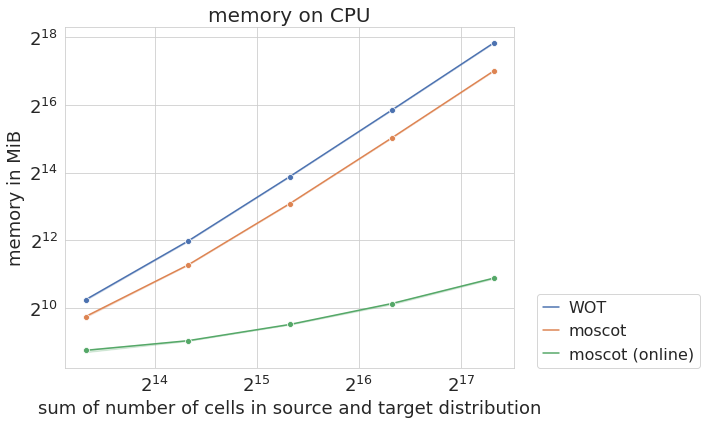

In [12]:
rows = 1
cols = 1
size = 5


fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)))
pl = sns.lineplot(x='n_cells', y='max_mem', hue="config.model", marker='o',err_style='band',
                     data=d, ax=axs, palette=palette, markers=True)
plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
handles, _labels = axs.get_legend_handles_labels()

labels = [*map(labels_dict.get, _labels)]

axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=1, loc=(1.05,0), 
            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('memory in MiB', fontsize=18)

axs.set_xlabel('sum of number of cells in source and target distribution', fontsize=18)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.set_title("memory on CPU", fontsize=20)
_, xlabels = plt.xticks()




plt.tight_layout()
plt.savefig(os.path.join("figures", "f_cpu_memory_full_rank.png"), dpi=300)


In [11]:
results[results["config.model"]=="WOT"]["max_mem"].max()

234557.63671875